In [24]:
import numpy as np
from matplotlib.image import imread
image_raw=imread('/content/flower.jpg')
image_raw

array([[[ 0, 19,  7],
        [ 0, 19,  7],
        [ 0, 19,  7],
        ...,
        [ 0, 15,  9],
        [ 0, 16, 10],
        [ 0, 17, 11]],

       [[ 0, 20,  8],
        [ 0, 19,  7],
        [ 0, 19,  7],
        ...,
        [ 0, 17, 11],
        [ 0, 17, 11],
        [ 1, 18, 12]],

       [[ 0, 20,  8],
        [ 0, 20,  8],
        [ 0, 19,  7],
        ...,
        [ 2, 19, 13],
        [ 2, 19, 13],
        [ 2, 19, 13]],

       ...,

       [[ 0, 19,  8],
        [ 0, 19,  8],
        [ 1, 18,  8],
        ...,
        [ 0, 20, 11],
        [ 0, 19, 10],
        [ 0, 19, 10]],

       [[ 0, 19,  8],
        [ 0, 19,  8],
        [ 1, 18,  8],
        ...,
        [ 1, 21, 12],
        [ 0, 20, 11],
        [ 0, 20, 11]],

       [[ 0, 19,  8],
        [ 0, 19,  8],
        [ 1, 18,  8],
        ...,
        [ 1, 21, 12],
        [ 0, 20, 11],
        [ 0, 20, 11]]], dtype=uint8)

In [25]:
image_raw.shape

(1500, 1000, 3)

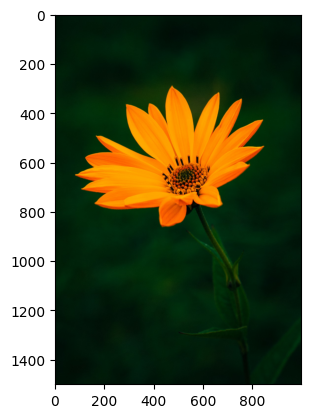

In [26]:
import matplotlib.pyplot as plt
plt.imshow(image_raw)  ##original image

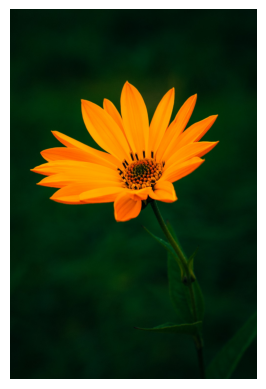

In [27]:
plt.imshow(image_raw)
plt.axis(False)
plt.show()

In [28]:
i=image_raw.sum(axis=2) # print the two axes
i.shape

(1500, 1000)

In [29]:
ib=i/i.max()
ib.max()

1.0

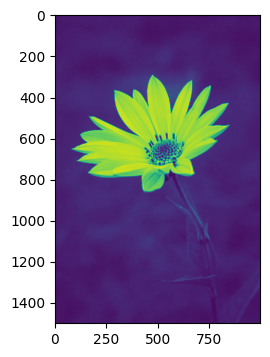

In [30]:
plt.figure(figsize=(6,4))
plt.imshow(ib)

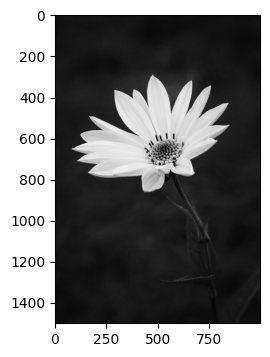

In [31]:
plt.figure(figsize=(6,4))
plt.imshow(ib,cmap=plt.cm.gray) ##gray image

In [32]:
from sklearn.decomposition import PCA, IncrementalPCA
pca=PCA()
pca.fit(ib)
var=np.cumsum(pca.explained_variance_ratio_)*100
k=np.argmax(var>95)
print("elements are "+str(k)) 

elements are 10


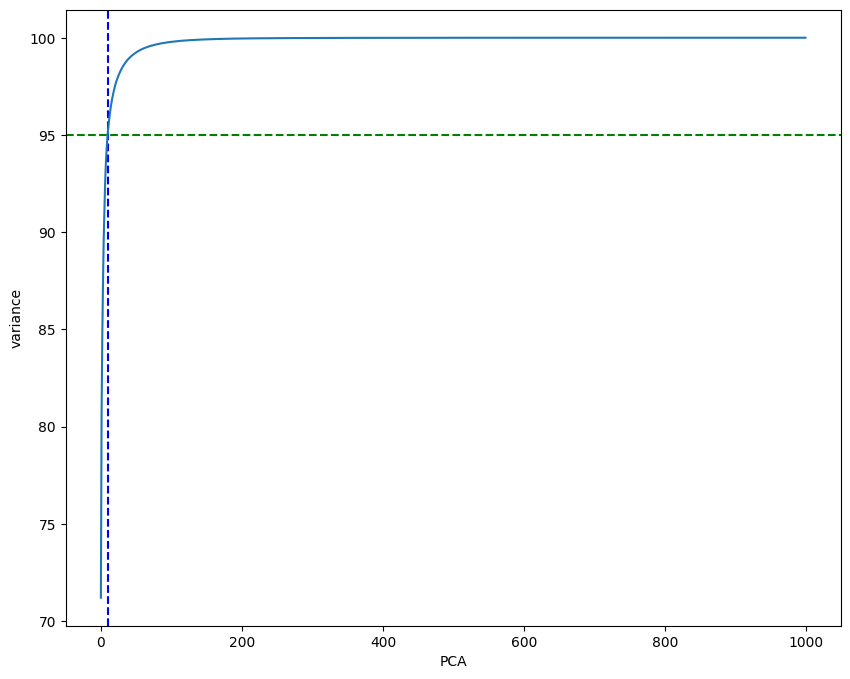

In [33]:
plt.figure(figsize=(10,8))
plt.ylabel('variance')
plt.xlabel('PCA')
plt.axvline(x=k,color='b',linestyle='--')
plt.axhline(y=95,color='g',linestyle='--')
ax=plt.plot(var)  

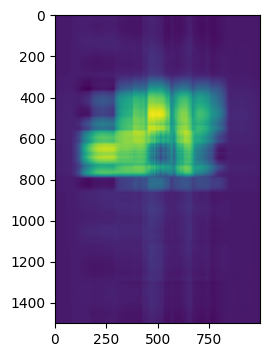

In [34]:
ipca=IncrementalPCA(n_components=2)
i=ipca.inverse_transform(ipca.fit_transform(ib))
plt.figure(figsize=(6,4))
plt.imshow(i)

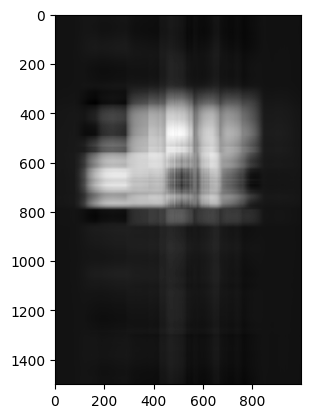

In [35]:
plt.imshow(i,cmap=plt.cm.gray)

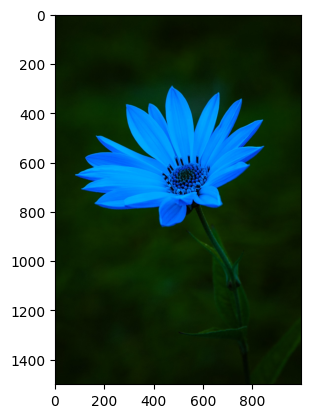

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import cv2
o_img=cv2.imread('/content/flower.jpg')
img=cv2.cvtColor(o_img,cv2.COLOR_BGR2RGB)
v=img.reshape(-1,3)
plt.imshow(o_img)

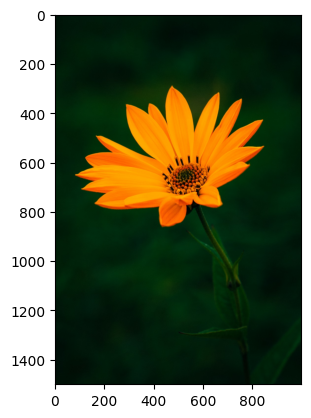

In [37]:
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f4557da1570>)

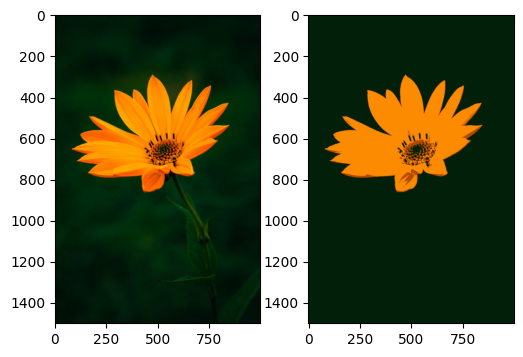

In [38]:
import numpy as np
v=np.float32(v)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
k=3
attempts=10
ret,label,center=cv2.kmeans(v,k,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center=np.uint8(center)
res=center[label.flatten()]
r=res.reshape(img.shape)
f1=6
f2=4
plt.figure(figsize=(f1,f2))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(r)

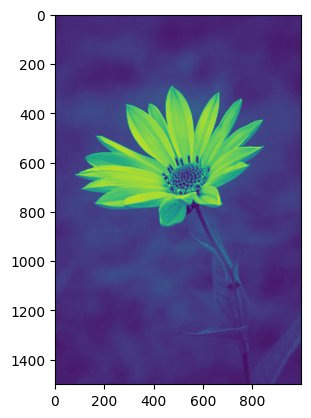

In [39]:
gray_image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2GRAY) ##convert to grey image
plt.imshow(gray_image)

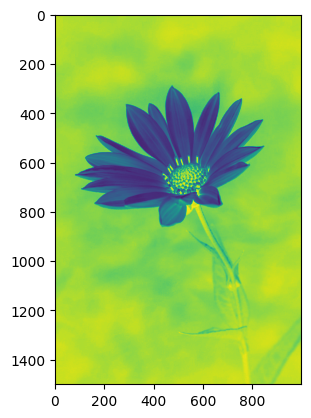

In [40]:
inverted_image=255-gray_image ## converting to invert image
plt.imshow(inverted_image)

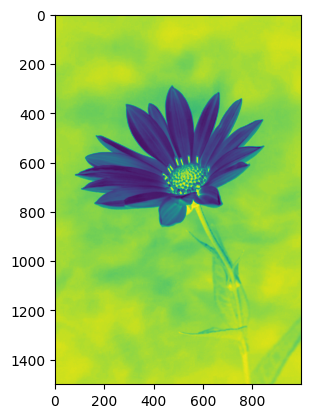

In [41]:
## gaussian Blur image
gblur_image1=cv2.GaussianBlur(inverted_image,(5,5),0) ##kernel size
plt.imshow(gblur_image1)

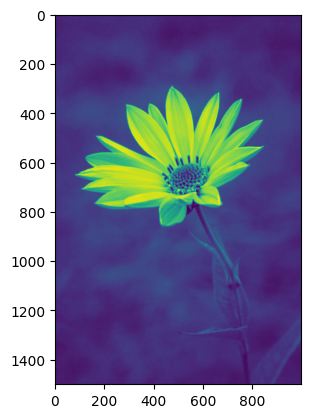

In [42]:
## inverted gaussian blur image
invgblur_image=255-gblur_image1
plt.imshow(invgblur_image)

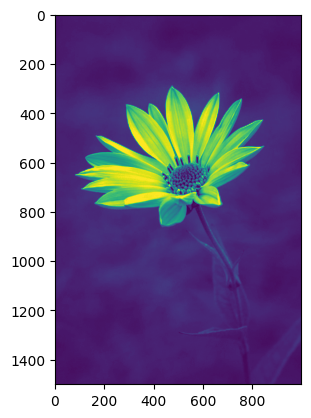

In [43]:
blur_image=255-inverted_image
p_image=255-blur_image
pencil_sketch1=cv2.divide(gray_image,p_image,scale=256.0)
plt.imshow(pencil_sketch1)

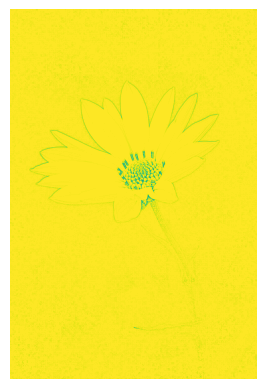

In [44]:
sketch_img=cv2.divide(gray_image,invgblur_image,scale=256.0)
plt.axis(False)
plt.imshow(sketch_img)

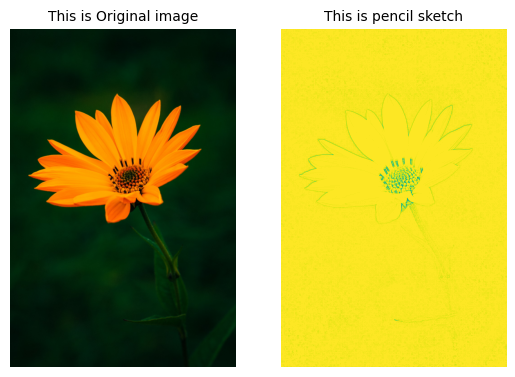

In [45]:
#original image vs Pencil sketch image comparison
plt.subplot(1,2,1)
plt.title('This is Original image',size=10)
plt.imshow(image_raw)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('This is pencil sketch',size=10)
plt.imshow(sketch_img)
plt.axis('off')
plt.show()

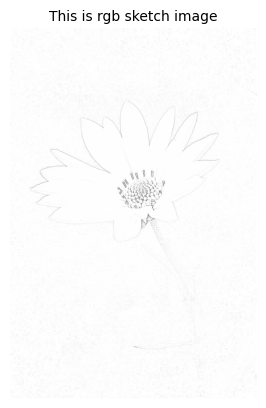

In [46]:
plt.title('This is rgb sketch image',size=10)
sketch=cv2.cvtColor(sketch_img,cv2.COLOR_BGR2RGB)
plt.imshow(sketch)
plt.axis('off')
plt.show()